<a href="https://colab.research.google.com/github/kibov23/Analisis_Gol_UCL_2021-2022/blob/main/Final_Project_MCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Introduction***

Pada final project ini, saya akan menganalisis mengenai gol yang tercipta pada UEFA CHAMPIONS LEAGUE musim 2021/2022. Dataset goal_ucl ini berisikan informasi mengenai nama pemain, klub pemain, posisi pemain, jumlah gol, gol kaki kanan, gol kaki kiri, gol kepala, gol dari anggota tubuh lain, gol dari eksekusi pinalti, dan jumlah pertandingan yang dimainkan

Berikut deskripsi 13 kolom pada dataset ini, yaitu:


*   ***serial***: urutan nomor
*   ***player_name***: nama pemain
*   ***club***: club dari pemain
*   ***position***: posisi pemain
*   ***goals***: jumlah gol yang tercipta dari pemain
*   ***right_foot***: jumlah gol yang tercipta dengan menggunakan kaki kanan
*   ***left_foot***: jumlah gol yang tercipta dengan menggunakan kaki kiri
*   ***headers***: jumlah gol yang tercipta dengan menggunakan kepala atau sundulan
*   ***others***: jumlah gol yang tercipta dengan menggunakan anggota tubuh selain kaki kanan, kaki kiri, dan kepala
*   ***inside_area***: jumlah gol yang tercipta dari dalam area kotak penalti
*   ***outside_area***: jumlah gol yang tercipta dari luar area kotak penalti
*   ***penalties***: jumlah gol yang tercipta dari eksekusi hadiah penalti
*   ***match_played***: jumlah pertandingan yang dimainkan

Sumber: kaggle.com

By: Muhammad Faris


# ***Import Libraries***

In [ ]:
import numpy as np
import pandas as pd
from calendar import month_abbr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ***Import Dataset***

In [ ]:
df_goals = pd.read_csv('/content/goals_ucl_csv.csv')

# ***EDA***

In [ ]:
df_goals.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [ ]:
df_goals.columns

Index(['serial', 'player_name', 'club', 'position', 'goals', 'right_foot',
       'left_foot', 'headers', 'others', 'inside_area', 'outside_areas',
       'penalties', 'match_played'],
      dtype='object')

In [ ]:
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    int64 
 12  match_played   183 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 18.7+ KB


In [ ]:
df_goals.shape

(183, 13)

In [ ]:
df_goals.describe().T

,count,mean,std,min,25%,50%,75%,max
serial,183.0,55.016393,24.173929,1.0,43.0,73.0,73.0,73.0
goals,183.0,2.021858,2.005367,1.0,1.0,1.0,2.0,15.0
right_foot,183.0,0.972678,1.400281,0.0,0.0,1.0,1.0,11.0
left_foot,183.0,0.693989,1.140810,0.0,0.0,0.0,1.0,8.0
headers,183.0,0.327869,0.612722,0.0,0.0,0.0,1.0,3.0
others,183.0,0.021858,0.146621,0.0,0.0,0.0,0.0,1.0
inside_area,183.0,1.814208,1.923943,0.0,1.0,1.0,2.0,13.0
outside_areas,183.0,0.207650,0.514137,0.0,0.0,0.0,0.0,3.0
penalties,183.0,0.196721,0.549315,0.0,0.0,0.0,0.0,3.0
match_played,183.0,6.841530,2.568196,1.0,5.0,6.0,8.0,13.0


In [ ]:
df_goals.nunique()

serial            11
player_name      183
club              32
position           3
goals             11
right_foot         9
left_foot          7
headers            4
others             2
inside_area       10
outside_areas      4
penalties          4
match_played      13
dtype: int64

In [ ]:
#Missing Values
df_goals.isnull().sum()

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

In [ ]:
#Check Duplicate
df_goals['player_name'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
178    False
179    False
180    False
181    False
182    False
Name: player_name, Length: 183, dtype: bool

In [ ]:
#Tes Group
df_goals.groupby("position").goals.agg([min,max,sum])

,min,max,sum
position,,,
Defender,1,2,35
Forward,1,15,197
Midfielder,1,7,138


In [ ]:
#Tes Sorting
df_goals.sort_values(by="penalties", ascending=False).head(7)

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
35,23,Dybala,Juventus,Forward,3,0,3,0,0,3,0,2,5
34,23,Adeyemi,Salzburg,Forward,3,0,3,0,0,3,0,2,8
5,5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2,12
42,43,Jorginho,Chelsea,Midfielder,2,2,0,0,0,2,0,2,8
43,43,Rakitić,Sevilla,Midfielder,2,2,0,0,0,2,0,2,5


# ***Visualization***

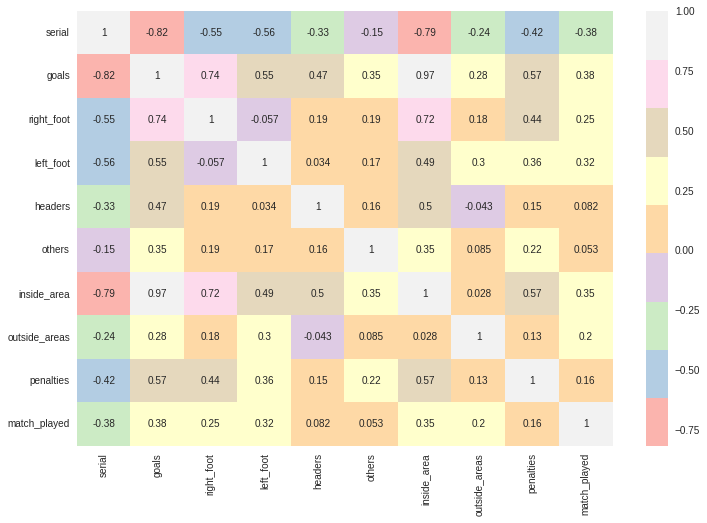

In [ ]:
#Corellation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_goals.corr(), annot=True, cmap='Pastel1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

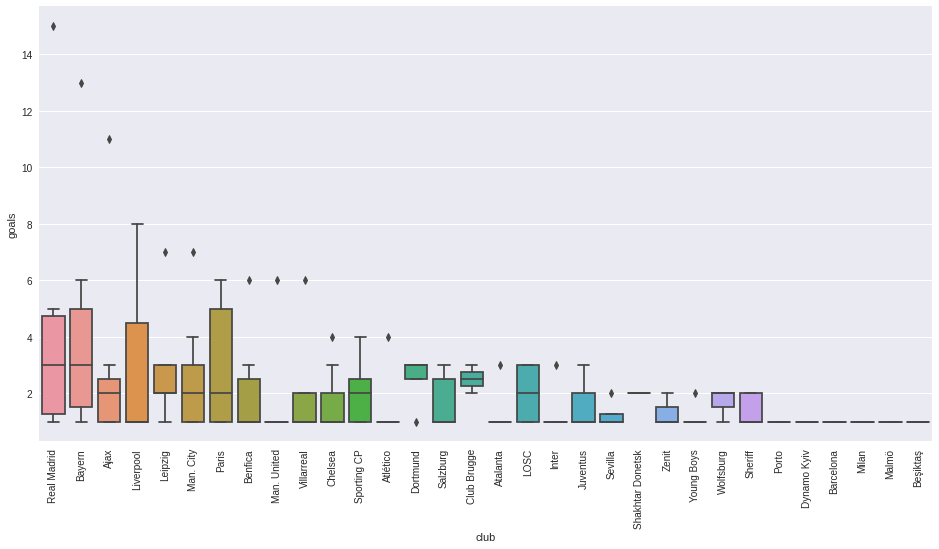

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='club',y='goals', data=df_goals)
plt.xticks(rotation=90)

<Figure size 864x576 with 0 Axes>

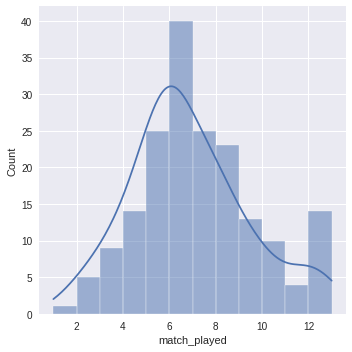

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data=df_goals, x="match_played", kde=True )

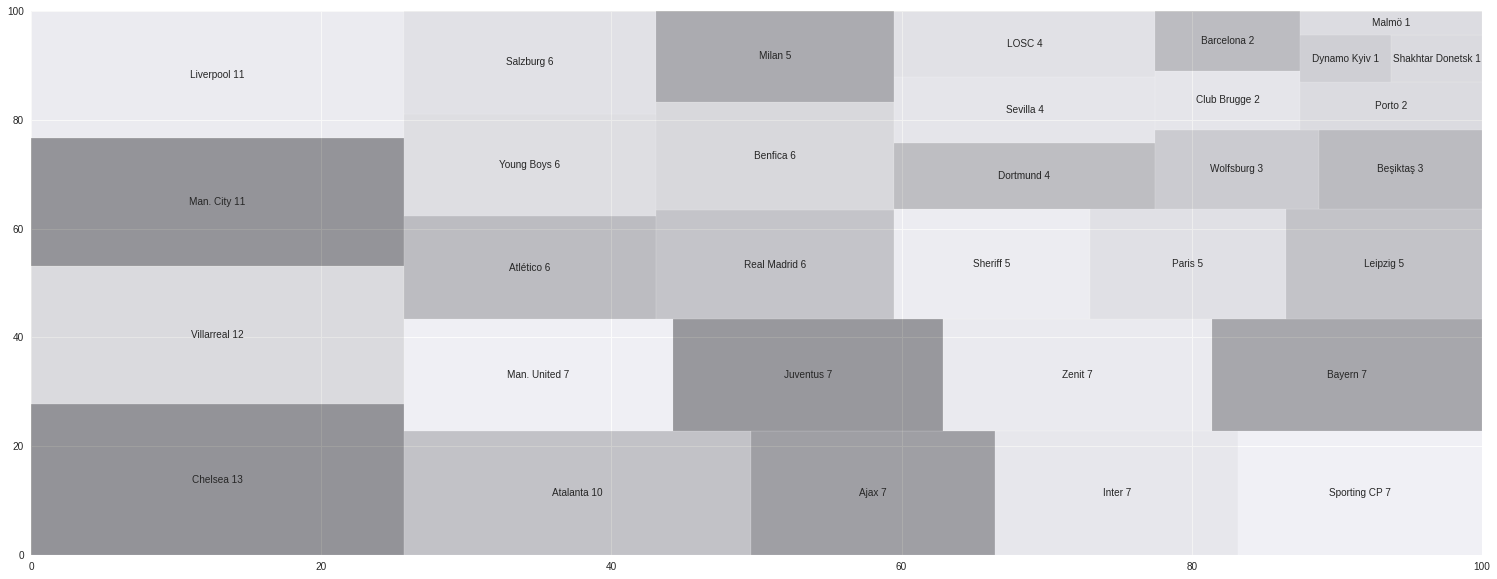

In [ ]:
#Kontribusi Pemain yang mencetak gol di setiap club
fig = plt.figure(figsize=(26,10))
sizes=df_goals.groupby('club',)['player_name'].count().sort_values(ascending= False).tolist()
label=df_goals.groupby('club',)['player_name'].count().sort_values(ascending= False).index.values.tolist()
final_label = [i+" "+j for i, j in zip(label, [str(x) for x in sizes])]

squarify.plot(sizes=sizes, label=final_label, alpha=0.4 )

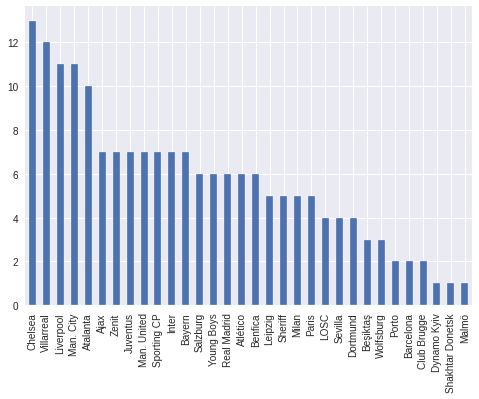

In [ ]:
#Kontribusi Pemain yang mencetak gol di setiap club
df_goals.club.value_counts(ascending = False).plot(kind = 'bar');

**Jumlah gol setiap club UCL**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

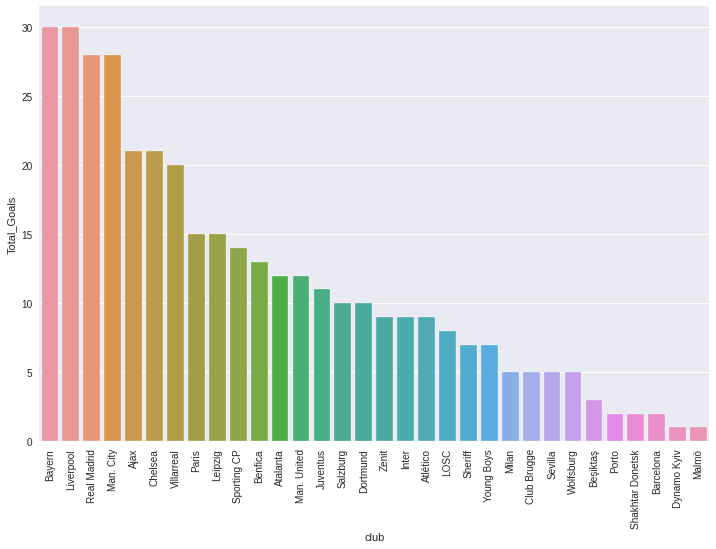

In [ ]:
#Jumlah gol setiap club ucl
df_goals['Total_Goals'] = df_goals['goals']
team_aggresive = pd.DataFrame(df_goals.groupby('club',as_index = False)['Total_Goals'].sum().sort_values(by='Total_Goals',ascending=False))
plt.figure(figsize=(12,8))
sns.barplot(x='club', y = 'Total_Goals', data=team_aggresive)
plt.xticks(rotation=90)

**10 Pemain Pencetak Gol Terbanyak**

In [ ]:
#10 Pencetak Gol Terbanyak di UCL (Tabel)
df_goals[["player_name","goals"]].sort_values("goals",ascending=False).reset_index(drop=True).head(10).style.background_gradient("Blues")

,player_name,goals
0,Benzema,15
1,Lewandowski,13
2,Haller,11
3,Salah,8
4,Nkunku,7
5,Mahrez,7
6,Ronaldo,6
7,Sané,6
8,Danjuma,6
9,Núñez,6


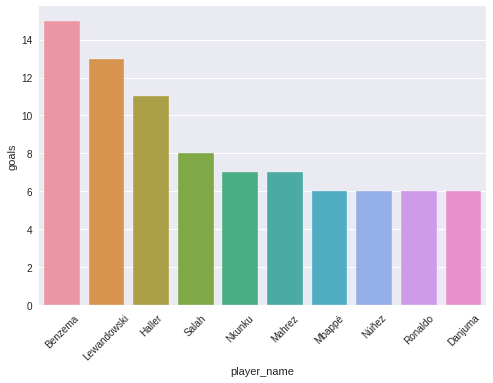

In [ ]:
#10 Pencetak Gol Terbanyak di UCL (Diagram)
x = df_goals["player_name"].head(10)
plot = sns.barplot(x = x, y = 'goals', data = df_goals)
plot.set_xticklabels(labels = x , rotation = 45)
print()

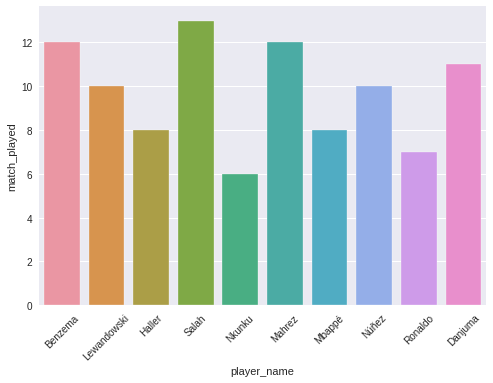

In [ ]:
#Pertandingannya
x = df_goals["player_name"].head(10)
plot = sns.barplot(x = x, y = 'match_played', data = df_goals)
plot.set_xticklabels(labels = x , rotation = 45)
print()

**Bagian tubuh terciptanya gol**

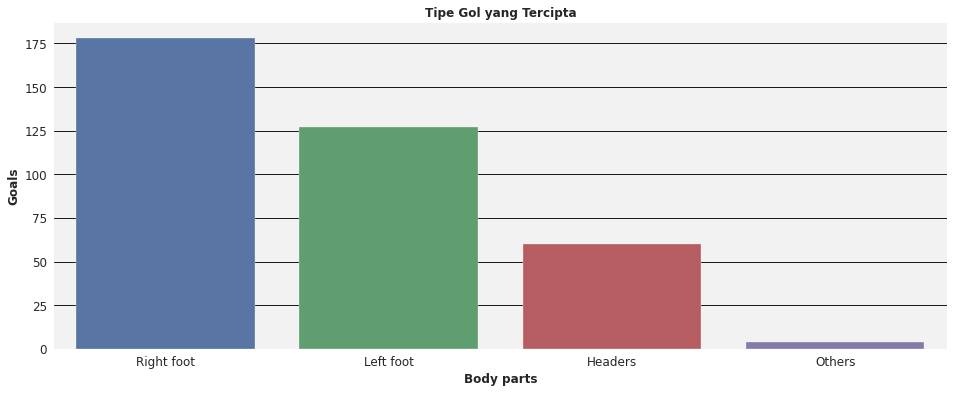

In [ ]:
#Tipe gol yang tercipta
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95','grid.color': '0.1','figure.facecolor': '0.95'})

plt.title('Tipe Gol yang Tercipta', fontsize=12, fontweight='bold')
plt.xlabel('Body parts', fontsize=12, fontweight='bold')
plt.ylabel('Goals', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.barplot(x=['Right foot', 'Left foot', 'Headers', 'Others'], y=[df_goals['right_foot'].sum(),
                                                                   df_goals['left_foot'].sum(),
                                                                   df_goals['headers'].sum(),
                                                                   df_goals['others'].sum()])
plt.show()

In [ ]:
#Tipe gol yang tercipta
df_goals_sum = pd.DataFrame(df_goals.sum(numeric_only = True),).T[["right_foot","left_foot","headers","others"]]
df_goals_sum=df_goals_sum.T
fig = px.pie(df_goals_sum, values=0, names=df_goals_sum.index, title='Tipe Gol yang Tercipta', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

**Daerah terciptanya Gol**

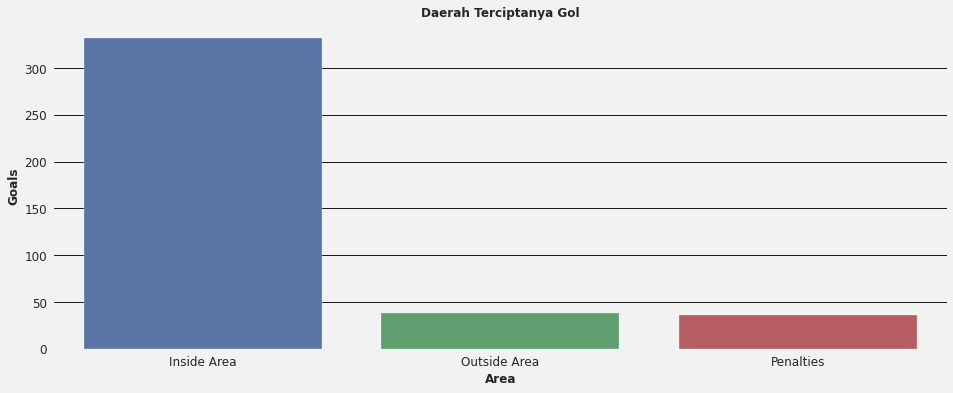

In [ ]:
#Daerah Terciptanya Gol
plt.figure(figsize=(16, 6))
sns.set_style('darkgrid',
              {'axes.facecolor': '0.95','grid.color': '0.1','figure.facecolor': '0.95'})

plt.title('Daerah Terciptanya Gol', fontsize=12, fontweight='bold')
plt.xlabel('Area', fontsize=12, fontweight='bold')
plt.ylabel('Goals', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.barplot(x=['Inside Area', 'Outside Area', 'Penalties'], y=[df_goals['inside_area'].sum(),
                                                                   df_goals['outside_areas'].sum(),
                                                                   df_goals['penalties'].sum()])
plt.show()

In [ ]:
#Daerah Terciptanya Gol
df_goals_sum = pd.DataFrame(df_goals.sum(numeric_only = True),).T[["inside_area","outside_areas","penalties"]]
df_goals_sum=df_goals_sum.T
fig = px.pie(df_goals_sum, values=0, names=df_goals_sum.index, title='Daerah Terciptanya Gol', color_discrete_sequence= px.colors.sequential.RdBu)
fig.show()

**Bek dengan Jumlah Gol Terbanyak**

In [ ]:
#Bek dengan Jumlah Gol Terbanyak (Tabel)
df_goals[['player_name', 'club', 'position', 'goals']][df_goals['position']=='Defender'].sort_values(by='goals', ascending = False)[:10]

,player_name,club,position,goals
48,João Cancelo,Man. City,Defender,2
71,Coates,Sporting CP,Defender,2
70,Konaté,Liverpool,Defender,2
181,Morato,Benfica,Defender,1
176,Montero,Beşiktaş,Defender,1
172,Aké,Man. City,Defender,1
171,Demiral,Atalanta,Defender,1
167,Alex Sandro,Juventus,Defender,1
136,Moreno,Villarreal,Defender,1
161,Renan Lodi,Atlético,Defender,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

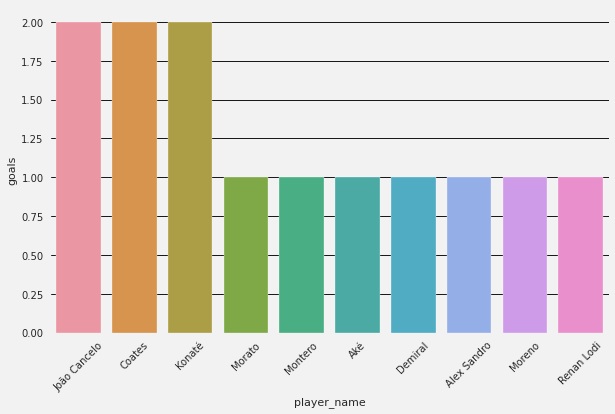

In [ ]:
#Bek dengan Jumlah Gol Terbanyak (Diagram)
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='goals', data=df_goals[df_goals['position']=='Defender'].sort_values(by='goals', ascending = False)[:10])
plt.xticks(rotation=45)

**Pemain Tengah dengan Jumlah Gol Terbanyak**

In [ ]:
#Pemain Tengah dengan Jumlah Gol Terbanyak (Tabel)
df_goals[['player_name', 'club', 'position', 'goals']][df_goals['position']=='Midfielder'].sort_values(by='goals', ascending = False)[:10]

,player_name,club,position,goals
4,Nkunku,Leipzig,Midfielder,7
5,Mahrez,Man. City,Midfielder,7
9,Danjuma,Villarreal,Midfielder,6
10,Sané,Bayern,Midfielder,6
11,Firmino,Liverpool,Midfielder,5
12,Mané,Liverpool,Midfielder,5
17,Pedro Gonçalves,Sporting CP,Midfielder,4
36,Bernardo Silva,Man. City,Midfielder,3
40,Havertz,Chelsea,Midfielder,3
28,Foden,Man. City,Midfielder,3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

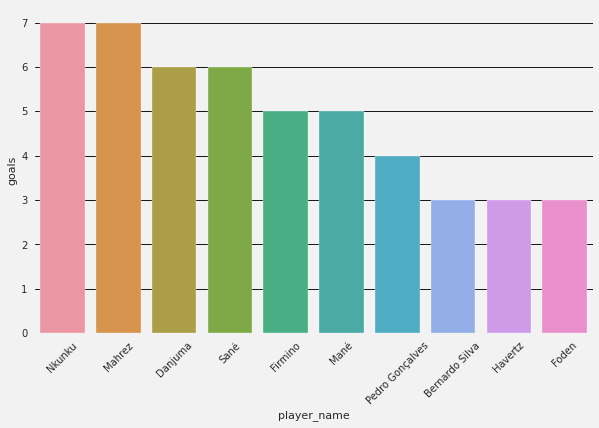

In [ ]:
#Pemain Tengah dengan Jumlah Gol Terbanyak (Diagram)
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='goals', data=df_goals[df_goals['position']=='Midfielder'].sort_values(by='goals', ascending = False)[:10])
plt.xticks(rotation=45)

**Striker dengan Jumlah Gol Terbanyak**

In [ ]:
#Striker dengan Jumlah Gol Terbanyak (Tabel)
df_goals[['player_name', 'club', 'position', 'goals']][df_goals['position']=='Forward'].sort_values(by='goals', ascending = False)[:10]

,player_name,club,position,goals
0,Benzema,Real Madrid,Forward,15
1,Lewandowski,Bayern,Forward,13
2,Haller,Ajax,Forward,11
3,Salah,Liverpool,Forward,8
6,Mbappé,Paris,Forward,6
7,Núñez,Benfica,Forward,6
8,Ronaldo,Man. United,Forward,6
13,Rodrygo,Real Madrid,Forward,5
14,Messi,Paris,Forward,5
20,Müller,Bayern,Forward,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

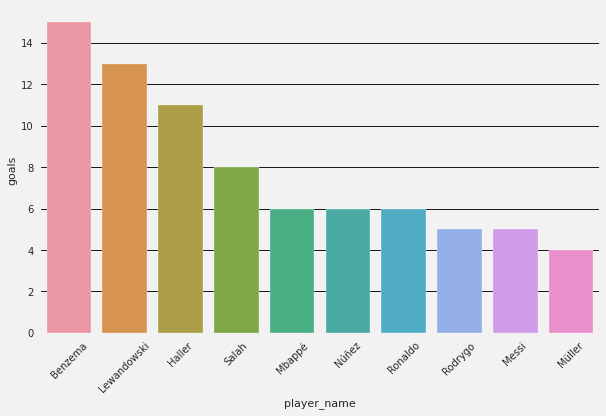

In [ ]:
#Striker dengan Jumlah Gol Terbanyak (Diagram)
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='goals', data=df_goals[df_goals['position']=='Forward'].sort_values(by='goals', ascending = False)[:10])
plt.xticks(rotation=45)

In [ ]:
df_goals[["player_name","club","right_foot"]].sort_values("right_foot",ascending=False).reset_index(drop=True).head(10).style.background_gradient("Blues")

,player_name,club,right_foot
0,Benzema,Real Madrid,11
1,Lewandowski,Bayern,8
2,Mbappé,Paris,6
3,Núñez,Benfica,5
4,Ronaldo,Man. United,5
5,Werner,Chelsea,4
6,Jesus,Man. City,4
7,Pedro Gonçalves,Sporting CP,4
8,Okafor,Salzburg,3
9,Vinícius Júnior,Real Madrid,3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

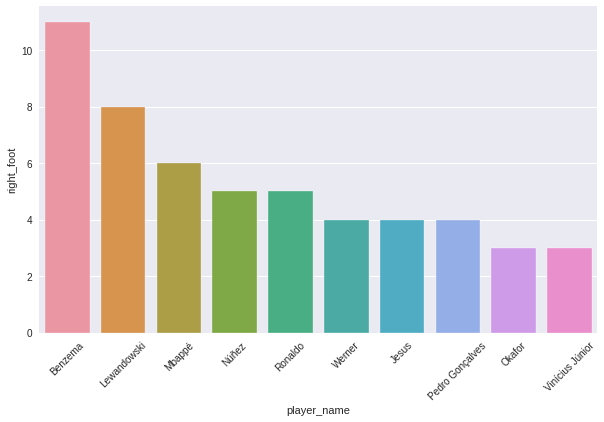

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='right_foot', data=df_goals.sort_values(by='right_foot', ascending = False)[:10])
plt.xticks(rotation=45)

Benzema menciptakan 11 Gol di UCL menggunakan kaki kanan

In [ ]:
df_goals[["player_name","club","left_foot"]].sort_values("left_foot",ascending=False).reset_index(drop=True).head(10).style.background_gradient("Blues")

,player_name,club,left_foot
0,Salah,Liverpool,8
1,Sané,Bayern,5
2,Messi,Paris,5
3,Griezmann,Atlético,4
4,Haller,Ajax,4
5,Mahrez,Man. City,4
6,Paulinho,Sporting CP,3
7,Berghuis,Ajax,3
8,Mané,Liverpool,3
9,Bernardo Silva,Man. City,3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

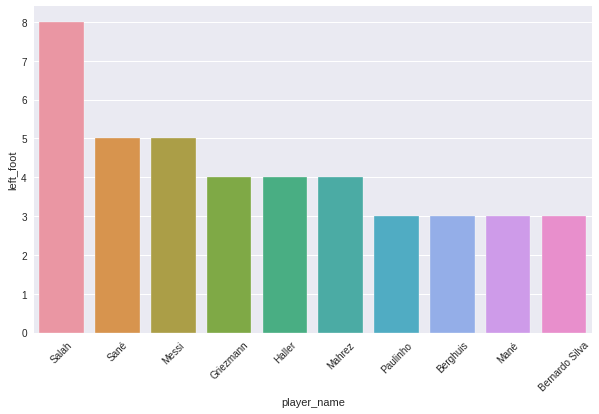

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='left_foot', data=df_goals.sort_values(by='left_foot', ascending = False)[:10])
plt.xticks(rotation=45)

Salah menciptakan 8 Gol di UCL menggunakan kaki kiri




In [ ]:
df_goals[["player_name","club","headers"]].sort_values("headers",ascending=False).reset_index(drop=True).head(10).style.background_gradient("Blues")

,player_name,club,headers
0,Benzema,Real Madrid,3
1,Haller,Ajax,3
2,Nkunku,Leipzig,3
3,Konaté,Liverpool,2
4,Coates,Sporting CP,2
5,Havertz,Chelsea,2
6,Haaland,Dortmund,2
7,Mahrez,Man. City,2
8,Lewandowski,Bayern,1
9,Diogo Jota,Liverpool,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

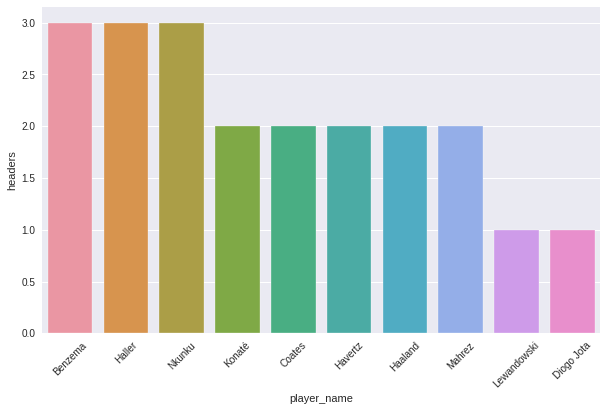

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='headers', data=df_goals.sort_values(by='headers', ascending = False)[:10])
plt.xticks(rotation=45)

Benzema, Haller, Nkunku menciptakan 3 Gol di UCL menggunakan kepala

# ***Conclusion***



1. Klub dengan kontribusi pemain terbanyak yang bisa mencetak gol di UCL yaitu Chelsea dengan 13 Pemain.
2. Bayern dan Liverpool menjadi club dengan perolehan gol terbanyak yaitu 30 gol.
3. Benzema menjadi pemain dengan jumlah gol terbanyak yaitu 15 gol.
4. Gol dengan menggunkan kaki kanan adalah gol terbanyak diantara gol dengan anggota tubuh lain.
5. Gol yang tercipta di area kotak pinalti adalah 332 gol.
6. Bek dengan jumlah gol terbanyak yaitu Joao Cancelo (Bisa dijadikan rekomendasi untuk klub-klub lain yang mencari Bek ketika bursa transfer nanti).
7. Pemain tengah dengan jumlah gol terbanyak yaitu Nkuku (Bisa dijadikan rekomendasi untuk klub-klub lain yang mencari pemain tengah ketika bursa transfer nanti).
8. Striker dengan jumlah pemain terbanyak yaitu Benzema (Bisa dijadikan rekomendasi untuk klub-klub lain yang mencari striker ketika bursa transfer nanti).
9. Benzema menciptakan gol terbanyak menggunakan kaki kanan dan kepala di UCL musim 2021/2022, sehingga klub Benzema yaitu real madrid seharusnya mengasuransikan kaki kanan dan kepala Benzema karena itu merupakan salah satu aset dari Real Madrid.
10. Salah menciptakan gol terbanyak menggunakan kaki kiri di UCL musim 2021/2022, sehingga klub Salah yaitu Liverpool seharusnya mengasuransikan kaki kiri Salah karena itu merupakan salah satu aset dari Liverpool.






